## Model Comparison

In [5]:
import pandas as pd

In [32]:
models = ['yolo', 'fastrcnn', 'detecto']

### Load Model Metrics


In [36]:
dfs = {}

for model in models: 
    dfs[model] = pd.read_pickle(f"../results/model_{model}_metrics.pkl")


In [37]:
for model in models:
    if not 'model' in dfs[model]:
        dfs[model]['model'] = model

df = pd.concat(dfs.values())

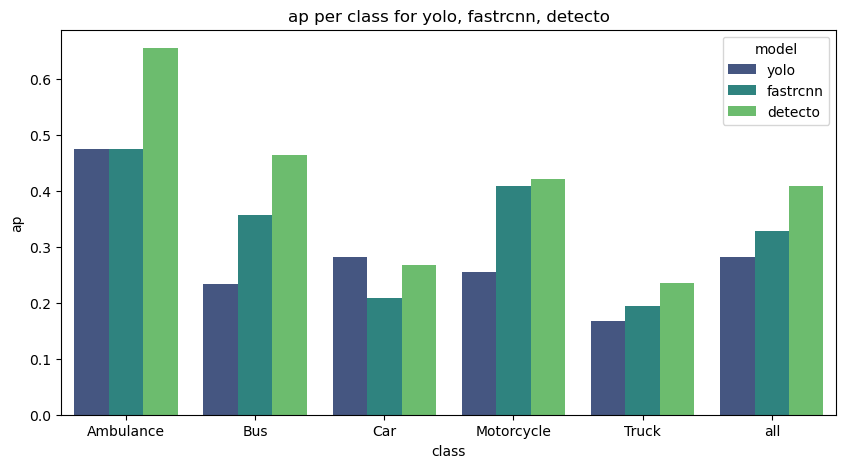

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Plot for mAP per class and model
plt.figure(figsize=(10, 5))
sns.barplot(x='class', y='ap', hue='model', data=df, palette='viridis')
plt.title(f"ap per class for {', '.join(models)}")
plt.show()